# Проект: Исследование стартапов
Автор: Мулашкина Татьяна <br>
Дата: 16.04.2025

## Введение
Финансовая компания, которая предоставляет льготные займы стартапам, хочет войти на инвестиционный рынок с прицелом на покупку, развитие и последующую перепродажу перспективных стартапов. Для разработки модели бизнеса нужна информация. Чтобы выработать общее понимание, какие данные могут быть полезны, проводится исследование на исторических данных. <br>
Исследование на этом наборе датасетов уже пытались проводить внутренними силами, но собственных аналитиков у компании нет и для решения задачи пригласили аутсорс-специалистов. Данные неполны, поэтому заказчик, кроме ответа на некоторые интересующие его вопросы, просит аккуратно относиться к получаемым в процессе исследования значениям показателей и выводам и стараться оценивать их на возможные искажения.

### Цель проекта
Подготовить датасет и проверить, что данные в нём соответствуют здравому смыслу, а также ответить на вопросы заказчика как о предобработке, так и о значении данных для бизнеса.

### Задачи
Ответить на следующие вопросы заказчика:
- по каким столбцам можно объединять данные из разных таблиц;
- можно ли доверять данным о сотрудниках стартапов и их образовании;
- что значат покупки за 0 или за 1 доллар;
- какая цена в зависимости от категории стартапов и количества раундов финансирования перед его покупкой;
- как рассчитать и отобразить численные показатели и динамику.
### Описание данных
#### Таблица acquisition
Содержит информацию о покупках одними компаниями других компаний:
- id — идентификатор покупки.
- acquiring_company_id — идентификатор покупающей компании.
- acquired_company_id — идентификатор покупаемой компании.
- term_code — варианты расчёта.
- price_amount — сумма сделки.
- acquired_at — дата сделки.
#### Таблица company_and_rounds
Содержит информацию о компаниях и раундах финансирования:
- company ID — идентификатор компании.
- name — название компании.
- category code — категория области деятельности компании.
- status — статус компании.
- founded at — дата инвестирования.
- closed at — дата закрытия компании.
- domain — официальный сайт компании.
- network username — ник компании в сети.
- country code — код страны компании.
- investment rounds — число инвестиционных раундов.
- funding rounds — число раундов финансирования.
- funding total — сумма финансирования.
- milestones — вехи финансирования.
- funding round id — идентификатор этапа финансирования.
- company id — идентификатор компании.
- funded at — дата финансирования.
- funding round type — тип финансирования.
- raised amount — сумма финансирования.
- pre money valuation — предварительная денежная оценка.
- participants — число участников.
- is first round — является ли раунд первым.
- is last round — является раунд последним.
#### Таблица education
Содержит информацию об образовании сотрудника:
- id — идентификатор записи об образовании.
- person_id — идентификатор работника.
- instituition — название учебного заведения.
- graduated_at — дата получения образования.
#### Таблица people
Содержит информацию о сотрудниках:
- id — идентификатор сотрудника.
- first_name — имя сотрудника.
- last_name — фамилия сотрудника.
- company_id — идентификатор компании.
- network_username — ник в социальных сетях.
#### Таблица degrees
Содержит информацию о типе образования сотрудника:
- id — идентификатор записи.
- object_id — идентификатор сотрудника.
- degree_type — тип образования.
- subject — специальность.

## Содержание проекта
1. Знакомство с данными: загрузка и первичная предобработка
 - Изучение общей информации, исправление названия столбцов
 - Смена типов данных и анализ пропусков
2. Предобработка данных, предварительное исследование
- Изучение раундов финансирования по годам с использованием сводной таблицы и визуализации
- Выявление зависимости полноты сведений об образовании сотрудников от размера компании
- Проверка может ли столбец network_username использоваться дл объединения данных
- Работа над "проблемным" датасетом
3. Исследовательский анализ
- Объединение данных для ответа на вопросы заказчика, которые касаются интересующих его компаний. 
- Анали выбросов
- Исследование компаний, которые были проданы за ноль или за один доллар
- Анализ цен стартапов по категориям
- Анализ числа раундов стартапов перед покупкой
4. Итоговый вывод и рекомендации


## Шаг 1. Знакомство с данными: загрузка и первичная предобработка

Названия файлов:
* acquisition.csv
* company_and_rounds.csv
* people.csv
* education.csv
* degrees.csv

Опциональные датасеты:
* fund.csv
* investment.csv


Они находятся в папке datasets, если вы выполняете работу на платформе. В случае, если вы делаете работу локально, доступ к файлам в папке можно получить по адресу `https://code.s3.yandex.net/datasets/` + имя файла.

### 1.1. Вывод общей информации, исправление названия столбцов

- Загрузите все данные по проекту.
- Проверьте названия столбцов.
- Выведите информацию, которая необходима вам для принятия решений о предобработке, для каждого из датасетов.

In [1]:
!pip install phik -U

     |████████████████████████████████| 686 kB 1.3 MB/s eta 0:00:01


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from phik import phik_matrix

In [3]:
df_acquisition = pd.read_csv('acquisition.csv')
df_company_and_rounds = pd.read_csv('company_and_rounds.csv')
df_people = pd.read_csv('people.csv')
df_education = pd.read_csv('education.csv')
df_degrees = pd.read_csv('degrees.csv')

In [4]:
df_acquisition.info()
df_acquisition.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9407 entries, 0 to 9406
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    9407 non-null   int64 
 1   acquiring_company_id  9407 non-null   int64 
 2   acquired_company_id   9407 non-null   int64 
 3   term_code             1831 non-null   object
 4   price_amount          9407 non-null   int64 
 5   acquired_at           9378 non-null   object
dtypes: int64(4), object(2)
memory usage: 441.1+ KB


,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
0,1,11,10,NaN,20000000,2007-05-30
1,7,59,72,cash,60000000,2007-07-01
2,8,24,132,cash,280000000,2007-05-01
3,9,59,155,cash,100000000,2007-06-01
4,10,212,215,cash,25000000,2007-07-01


In [5]:
df_company_and_rounds.info()
df_company_and_rounds.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   company  ID            217472 non-null  float64
 1   name                   217472 non-null  object 
 2   category  code         143886 non-null  object 
 3   status                 217472 non-null  object 
 4   founded  at            109956 non-null  object 
 5   closed  at             3449 non-null    object 
 6   domain                 147159 non-null  object 
 7   network  username      95534 non-null   object 
 8   country  code          108607 non-null  object 
 9   investment  rounds     217472 non-null  float64
 10  funding  rounds        217472 non-null  float64
 11  funding  total         217472 non-null  float64
 12  milestones             217472 non-null  float64
 13  funding  round  id     52928 non-null   float64
 14  company  id            52928 non-nul

,company ID,name,category code,status,founded at,closed at,domain,network username,country code,investment rounds,...,milestones,funding round id,company id,funded at,funding round type,raised amount,pre money valuation,participants,is first round,is last round
0,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,888.0,1.0,2005-10-01,series-a,5250000.0,0.0,2.0,0.0,1.0
1,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,889.0,1.0,2007-01-01,series-b,9500000.0,0.0,3.0,0.0,0.0
2,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,2312.0,1.0,2008-05-19,series-c+,25000000.0,0.0,4.0,1.0,0.0
3,10.0,Flektor,games_video,acquired,NaN,NaN,flektor.com,NaN,USA,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100.0,There,games_video,acquired,NaN,NaN,there.com,NaN,USA,0.0,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df_people.info()
df_people.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226709 entries, 0 to 226708
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                226709 non-null  int64  
 1   first_name        226704 non-null  object 
 2   last_name         226708 non-null  object 
 3   company_id        34615 non-null   float64
 4   network_username  38867 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 8.6+ MB


,id,first_name,last_name,company_id,network_username
0,10,Mark,Zuckerberg,5.0,NaN
1,100,Peter,Lester,27.0,NaN
2,1000,Dr. Steven,E. Saunders,292.0,NaN
3,10000,Neil,Capel,2526.0,NaN
4,100000,Sue,Pilsch,NaN,NaN


In [7]:
df_education.info()
df_education.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            109610 non-null  int64 
 1   person_id     109610 non-null  int64 
 2   instituition  109555 non-null  object
 3   graduated_at  58054 non-null   object
dtypes: int64(2), object(2)
memory usage: 3.3+ MB


,id,person_id,instituition,graduated_at
0,1,6117,NaN,NaN
1,2,6136,"Washington University, St. Louis",1990-01-01
2,3,6136,Boston University,1992-01-01
3,4,6005,University of Greenwich,2006-01-01
4,5,5832,Rice University,NaN


In [8]:
df_degrees.info()
df_degrees.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           109610 non-null  int64 
 1   object_id    109610 non-null  object
 2   degree_type  98392 non-null   object
 3   subject      81298 non-null   object
dtypes: int64(1), object(3)
memory usage: 3.3+ MB


,id,object_id,degree_type,subject
0,1,p:6117,MBA,NaN
1,2,p:6136,BA,"English, French"
2,3,p:6136,MS,Mass Communication
3,4,p:6005,MS,Internet Technology
4,5,p:5832,BCS,"Computer Science, Psychology"


acquisition.csv:
- сожержит 9407 строк и 6 колонок
- название колонок приведены к snake case
- пропуски данных во всех колонках, кроме тех, что содержат индентификатор
- данные о дате сделки указаны в типе данных object

company_and_rounds.csv:
- содержит 217774 строк и 22 колонки
- названия колонок содержат пробелы (не приведены к snake case)
- в таблице содержатся две колонки с похожим названием и смыслом: company ID и company id
- данные о дате инвестирования, дате закрытия компании и дате финансирования указаны в типе данных object
- кроме того, кажется странным использование типа данных float для таких данных как: company ID, investmenr rounds, funding rounds, funding round id, company id, participants, is first round, is last round. Возможно стоит использовать для этих данных тип данных int
- пропуски сожерджатся во всех колонках
- причем можно обратить внимание, что с 13 по 22 колонку данные содержат одинаковое или сопоставимое количество пропусков
- также сомнения вызывает тип данных в колонке milestones. Это вехи финансирования. От англ. milestone (дословно — веха) — запланированная дата окончания работ по выборочным задачам. Однако данные, которые содержатся в представленной таблице не похоже на дату, возможно это интервал (в месяцах или годах)?

people.csv:
- содержит 226709 строк и 5 колонок
- название колонок приведены к snake case
- тип данных для company_id float
- пропуски во всех колонках, кроме тех, что содержат индентификатор

education.csv:
- содержит 109610 строк и 4 колонки
- название колонок приведены в snake case
- тип данных для даты получения образования (graduated at) object
- пропуски во всех колонках, кроме тех, что содержат индентификатор

degrees.csv
- содержит 109610 строк и 4 колонки
- название колонок приведены в snake case
- пропуски во всех колонках, кроме тех, что содержат индентификатор


In [9]:
#Приведем название колонок в company_and_rounds.csv в snake_case. 
# Однако не будем приводить их к одному регистру, чтобы не перепутать две колонки с одинаковым названием
df_company_and_rounds.columns = df_company_and_rounds.columns.str.replace('  ', '_')
df_company_and_rounds.columns

Index(['company_ID', 'name', 'category_code', 'status', 'founded_at',
       'closed_at', 'domain', 'network_username', 'country_code',
       'investment_rounds', 'funding_rounds', 'funding_total', 'milestones',
       'funding_round_id', 'company_id', 'funded_at', 'funding_round_type',
       'raised_amount', 'pre_money_valuation', 'participants',
       'is_first_round', 'is_last_round'],
      dtype='object')

In [10]:
df_company_and_rounds = df_company_and_rounds.rename(columns={'company_ID': 'company_id_companies', 'company_id': 'company_id_rounds'})
df_company_and_rounds.columns

Index(['company_id_companies', 'name', 'category_code', 'status', 'founded_at',
       'closed_at', 'domain', 'network_username', 'country_code',
       'investment_rounds', 'funding_rounds', 'funding_total', 'milestones',
       'funding_round_id', 'company_id_rounds', 'funded_at',
       'funding_round_type', 'raised_amount', 'pre_money_valuation',
       'participants', 'is_first_round', 'is_last_round'],
      dtype='object')

### 1.2. Смена типов и анализ пропусков

- Обработайте типы данных в столбцах, которые хранят значения даты и времени, если это необходимо.
- Оцените полноту данных — сделайте предварительный вывод, достаточно ли данных для решения задач проекта.

In [11]:
df_acquisition['acquired_at'] = pd.to_datetime(df_acquisition['acquired_at'])
df_company_and_rounds['founded_at'] = pd.to_datetime(df_company_and_rounds['founded_at'])
df_company_and_rounds['closed_at'] = pd.to_datetime(df_company_and_rounds['closed_at'])
df_company_and_rounds['funded_at'] = pd.to_datetime(df_company_and_rounds['funded_at'])
df_education['graduated_at'] = pd.to_datetime(df_education['graduated_at'])

In [12]:
dfs = {
    'df_acquisition': df_acquisition,
    'df_company_and_rounds': df_company_and_rounds,
    'df_education' : df_education,
    'df_degrees': df_degrees,
    'df_people': df_people
}

for name, df in dfs.items():
    print(f'Анализ датасета: {name}')
    print('Количество пропусков в каждом столбце в абсолютных значениях')
    print(df.isna().sum())
    print('Количество пропусков в каждом столбце в долях')
    print(df.isna().mean())
         
    tmp = df.copy()
    missing = pd.DataFrame({
        'Кол-во пропусков': tmp.isna().sum(),
        'Доля пропусков': tmp.isna().mean().round(4)
    }).style.background_gradient(cmap='coolwarm')
    
    display(missing)
    print('\n')    

Анализ датасета: df_acquisition
Количество пропусков в каждом столбце в абсолютных значениях
id                         0
acquiring_company_id       0
acquired_company_id        0
term_code               7576
price_amount               0
acquired_at               29
dtype: int64
Количество пропусков в каждом столбце в долях
id                      0.000000
acquiring_company_id    0.000000
acquired_company_id     0.000000
term_code               0.805358
price_amount            0.000000
acquired_at             0.003083
dtype: float64


,Кол-во пропусков,Доля пропусков
id,0,0.000000
acquiring_company_id,0,0.000000
acquired_company_id,0,0.000000
term_code,7576,0.805400
price_amount,0,0.000000
acquired_at,29,0.003100




Анализ датасета: df_company_and_rounds
Количество пропусков в каждом столбце в абсолютных значениях
company_id_companies       302
name                       302
category_code            73888
status                     302
founded_at              107818
closed_at               214325
domain                   70615
network_username        122240
country_code            109167
investment_rounds          302
funding_rounds             302
funding_total              302
milestones                 302
funding_round_id        164846
company_id_rounds       164846
funded_at               165094
funding_round_type      164846
raised_amount           164846
pre_money_valuation     164846
participants            164846
is_first_round          164846
is_last_round           164846
dtype: int64
Количество пропусков в каждом столбце в долях
company_id_companies    0.001387
name                    0.001387
category_code           0.339288
status                  0.001387
founded_at              0

,Кол-во пропусков,Доля пропусков
company_id_companies,302,0.001400
name,302,0.001400
category_code,73888,0.339300
status,302,0.001400
founded_at,107818,0.495100
closed_at,214325,0.984200
domain,70615,0.324300
network_username,122240,0.561300
country_code,109167,0.501300
investment_rounds,302,0.001400




Анализ датасета: df_education
Количество пропусков в каждом столбце в абсолютных значениях
id                  0
person_id           0
instituition       55
graduated_at    51556
dtype: int64
Количество пропусков в каждом столбце в долях
id              0.000000
person_id       0.000000
instituition    0.000502
graduated_at    0.470359
dtype: float64


,Кол-во пропусков,Доля пропусков
id,0,0.000000
person_id,0,0.000000
instituition,55,0.000500
graduated_at,51556,0.470400




Анализ датасета: df_degrees
Количество пропусков в каждом столбце в абсолютных значениях
id                 0
object_id          0
degree_type    11218
subject        28312
dtype: int64
Количество пропусков в каждом столбце в долях
id             0.000000
object_id      0.000000
degree_type    0.102345
subject        0.258298
dtype: float64


,Кол-во пропусков,Доля пропусков
id,0,0.000000
object_id,0,0.000000
degree_type,11218,0.102300
subject,28312,0.258300




Анализ датасета: df_people
Количество пропусков в каждом столбце в абсолютных значениях
id                       0
first_name               5
last_name                1
company_id          192094
network_username    187842
dtype: int64
Количество пропусков в каждом столбце в долях
id                  0.000000
first_name          0.000022
last_name           0.000004
company_id          0.847315
network_username    0.828560
dtype: float64


,Кол-во пропусков,Доля пропусков
id,0,0.000000
first_name,5,0.000000
last_name,1,0.000000
company_id,192094,0.847300
network_username,187842,0.828600


Анализ пропусков:
<br> Датасет df_acquisition </br>
- в основном не содержит пропусков
- доля пропусков в acquired_at составляет менее 1%, что не существенно для анализа данных (можно будет удалить)
- большое количество пропусков наблюдается в колонке term_code (варианты расчета), более 80% пропусков

<br> Датасет df_company_and_rounds </br>
- содержит наибольшее количество пропусков данных чем другие датасеты
- меньше 1% пропусков содержится в колонках: company_ID, name, status, investment_rounds, funding_rounds, funding_total, milestones. (можно будет удалить)
- в остальных колонках наблюдается существенное количество пропусков (от 32% до 56%)
- наибольшее количество пропусков наблюдается в колонке closed_at (дата закрытия компании)
- во второй половине датасета с колонки funding_round_id до is_last_round наблюдается одинаковое количество пропусков, их доля 75.7%

<br> Датасет df_education </br>
- Пропуски содержатся в колонке graduated_at (дата получения образования). Их доля 47%

<br> Датасет df_deegrees </br>
- Много пропусков содержатся в колонках degree_type (тип образования) и subject (специальность). Их доли 10 и 26 процентов соответсвенно

<br> Датасет df_people </br>
- Существенно количество пропусков содержатся в данных об индентификаторе компании (company_id) и ник в социальных сетях (network_username)

Промежуточный вывод: наиболее проблемным датасетом является df_company_and_rounds, так как содержит наибольшее количество пропуск данных, причем эти данные важны для ответов на поставленные клиентом вопросы.

## Шаг 2. Предобработка данных, предварительное исследование


### 2.1. Раунды финансирования по годам

Задание необходимо выполнить без объединения и дополнительной предобработки на основе датасета `company_and_rounds.csv`.

- Составьте сводную таблицу по годам, в которой на основании столбца `raised_amount` для каждого года указан:
    - типичный размер средств, выделяемый в рамках одного раунда;
    - общее количество раундов финансирования за этот год.
    
- Оставьте в таблице информацию только для тех лет, для которых есть информация о более чем 50 раундах финансирования.
- На основе получившейся таблицы постройте график, который будет отражать динамику типичного размера средств, которые стартапы получали в рамках одного раунда финансирования.

На основе полученных данных ответьте на вопросы:

- В каком году типичный размер собранных в рамках одного раунда средств был максимален?
- Какая тенденция по количеству раундов и выделяемых в рамках каждого раунда средств наблюдалась в 2013 году?

In [13]:
#Выделим из даты год:
df_company_and_rounds['funded_at_year'] = df_company_and_rounds['funded_at'].dt.year
df_company_and_rounds['funded_at_year']= pd.to_numeric(df_company_and_rounds['funded_at_year'].fillna(0), downcast='integer', errors='coerce')
#Создадим сводную таблицу и переименуем название колонок в ней:
pivot = df_company_and_rounds[df_company_and_rounds['funded_at_year'] > 0].pivot_table(values='raised_amount', index='funded_at_year', aggfunc=['median', 'count'])
pivot.columns = ['median_raised_amount', 'total_rounds']
print(pivot)
# Отфильтруем данные: оставим года, для которых есть информация о более чем 50 раундах финансирования.
pivot_filtered = pivot[pivot['total_rounds'] > 50]
print(pivot_filtered)

                median_raised_amount  total_rounds
funded_at_year                                    
1960                             0.0             9
1973                             0.0             1
1974                             0.0             2
1984                         41000.0             3
1985                             0.0             1
1987                       1250000.0             2
1989                         15000.0             1
1990                       1000000.0             1
1992                       2000000.0             1
1993                         62500.0             2
1994                       6700000.0             2
1995                       2000000.0             7
1996                         12500.0             7
1997                       3300000.0             9
1998                        100000.0            29
1999                       2000000.0            76
2000                       4200000.0           125
2001                       3000

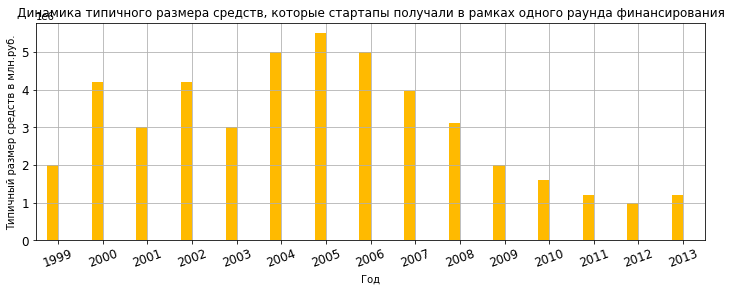

In [14]:
pivot_filtered.plot(kind = 'bar', legend=False,
                                          figsize = (12, 4), 
                                          title = 'Динамика типичного размера средств, которые стартапы получали в рамках одного раунда финансирования',
                                          xlabel = 'Год',
                                          ylabel = 'Типичный размер средств в млн.руб.', 
                                          rot = 20, 
                                          grid = True,
                                          color = '#ffba00',                                
                                          fontsize = 12)
plt.show()

- В каком году типичный размер собранных в рамках одного раунда средств был максимален?
В 2005 году размер собранных в рамках одного раунда средств был максимален
- Какая тенденция по количеству раундов и выделяемых в рамках каждого раунда средств наблюдалась в 2013 году?
В 2013 году число раундов и размер финансирования выросли по сравнению с прошлым годом


### 2.2. Люди и их образование

Заказчик хочет понять, зависит ли полнота сведений о сотрудниках (например, об их образовании) от размера компаний.

- Оцените, насколько информация об образовании сотрудников полна. Используя датасеты `people.csv` и `education.csv`, разделите все компании на несколько групп по количеству сотрудников и оцените среднюю долю сотрудников без информации об образовании в каждой из групп. Обоснуйте выбранные границы групп.
- Оцените, возможно ли для выполнения задания присоединить к этим таблицам ещё и таблицу `degrees.csv`.

In [15]:
df_people_education = df_people.merge(df_education, left_on = 'id', right_on = 'person_id',  how = 'left', suffixes = ('_people','_education'))
df_people_education.head()

,id_people,first_name,last_name,company_id,network_username,id_education,person_id,instituition,graduated_at
0,10,Mark,Zuckerberg,5.0,NaN,2415.0,10.0,Harvard University,NaT
1,100,Peter,Lester,27.0,NaN,NaN,NaN,NaN,NaT
2,1000,Dr. Steven,E. Saunders,292.0,NaN,NaN,NaN,NaN,NaT
3,10000,Neil,Capel,2526.0,NaN,NaN,NaN,NaN,NaT
4,100000,Sue,Pilsch,NaN,NaN,NaN,NaN,NaN,NaT


In [16]:
print('Минимальное количество сотрудников в компаниях')
print(df_people_education.groupby('company_id')['id_people'].count().min())
print('Максимальное количество сотрудников в компаниях')
print(df_people_education.groupby('company_id')['id_people'].count().max())

Минимальное количество сотрудников в компаниях
1
Максимальное количество сотрудников в компаниях
376


In [17]:
count_people = df_people_education.groupby('company_id')['id_people'].count().reset_index()
count_people.rename(columns={'id_people': 'count_people'}, inplace=True)
# Объединяем с исходным DataFrame
df_people_education = df_people_education.merge(count_people, on='company_id', how='left')

# Создаем категорию по количеству сотрудников
df_people_education['category_by_count_people'] = pd.cut(
    df_people_education['count_people'],
   bins=[1, 2, 3, 5, 15, 40, float('inf')],
    labels=['1', '2', '3-4', '5-15', '15-40', '40+'],
    right=False
)

df_people_education.head()

,id_people,first_name,last_name,company_id,network_username,id_education,person_id,instituition,graduated_at,count_people,category_by_count_people
0,10,Mark,Zuckerberg,5.0,NaN,2415.0,10.0,Harvard University,NaT,84.0,40+
1,100,Peter,Lester,27.0,NaN,NaN,NaN,NaN,NaT,14.0,5-15
2,1000,Dr. Steven,E. Saunders,292.0,NaN,NaN,NaN,NaN,NaT,3.0,3-4
3,10000,Neil,Capel,2526.0,NaN,NaN,NaN,NaN,NaT,2.0,2
4,100000,Sue,Pilsch,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN


In [18]:
df_people_education_isna = df_people_education[df_people_education['id_education'].isna()]

In [19]:
df_without_education = df_people_education_isna.groupby('category_by_count_people')['id_people'].count()
df_without_education

category_by_count_people
1        8381
2        2146
3-4      2155
5-15     2658
15-40     489
40+       322
Name: id_people, dtype: int64

In [20]:
df_all = df_people_education.groupby('category_by_count_people')['id_people'].count()
df_all

category_by_count_people
1        14150
2         9470
3-4       8895
5-15      8498
15-40     1949
40+       1827
Name: id_people, dtype: int64

In [21]:
round(df_without_education / df_all * 100, 2)

category_by_count_people
1        59.23
2        22.66
3-4      24.23
5-15     31.28
15-40    25.09
40+      17.62
Name: id_people, dtype: float64

Все сотрудники были разделены на 6 групп, границы групп брались таким образом, чтобы у каждой было примерно равное количество сотрудников, но из-за достаточно большого количества сотрудников в первой группе получилось, что в первой группе значение намного превосходит остальные. А  из-за небольшого количества компаний, где количество работников больше 15, в двух последних групп заметно меньше количество сотрудников

Таким образом, получилось, что наибольшая доля сотрудников без образования приходится на компании где один сотрудник. Для остальных категорий компаний доли не сильно отличаются меняются от 18% до 31%. И не наблюдается корреляции между числом сотрудников в компании и с долей сотрудников без информации об образовании.

При необходимости к этим данным присоединить таблицу degrees.csv для более подробно анализа информации об образовании. Можно было бы присоединить по столбцу object_id, предварительно его обработав, убрав буквы в id сотрудника. 

### 2.3. Объединять или не объединять — вот в чём вопрос

Некоторые названия столбцов встречаются в датасетах чаще других. В результате предварительной проверки датасетов было выяснено, что столбец `company_id` подходит для объединения данных.

- Установите, подходит ли для объединения данных столбец `network_username`, который встречается в нескольких датасетах. Нам необходимо понимать, дублируется ли для разных датасетов информация в столбцах с таким названием, и если да — то насколько часто.
- Оцените, можно ли использовать столбцы с именем `network_username` для объединения данных.

In [22]:
df_fund = pd.read_csv('https://code.s3.yandex.net/datasets/fund.csv')

In [23]:
# Удалим дубликаты в датасетах
df_fund_dup = df_fund.drop_duplicates(subset='network_username')
df_people_dup = df_people.drop_duplicates(subset='network_username')
df_company_and_rounds_dup = df_company_and_rounds.drop_duplicates(subset='network_username')

In [24]:
# Объединим три датасета
df_test = pd.merge(df_fund_dup, df_people_dup, on = 'network_username', how = 'outer')
df_test = pd.merge(df_test, df_company_and_rounds_dup, on = 'network_username', how = 'outer')
df_test.head()

,id_x,name_x,founded_at_x,domain_x,network_username,country_code_x,investment_rounds_x,invested_companies,milestones_x,id_y,...,funding_round_id,company_id_rounds,funded_at,funding_round_type,raised_amount,pre_money_valuation,participants,is_first_round,is_last_round,funded_at_year
0,13131.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,10.0,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1,1.0,Greylock Partners,1965-01-01,greylock.com,greylockvc,USA,307.0,196.0,0.0,NaN,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10015.0,IMI.VC,2011-07-31,imi.vc,imi_vc,RUS,2.0,2.0,4.0,NaN,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1002.0,Alven Capital,2000-01-01,alvencapital.com,alvencap,FRA,43.0,36.0,1.0,NaN,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10020.0,East Valley Ventures,2011-01-01,eastvalleyventures.com,EastValleyVent,CAN,2.0,2.0,0.0,NaN,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
# Считаем количество дубликатов в итоговой таблице
print("Количество дубликатов в итоговом датафрейме: ", df_test.duplicated().sum())

Количество дубликатов в итоговом датафрейме:  0


In [26]:
# Извлекаем уникальные network_username из каждой таблицы
people_users = set(df_people['network_username'].dropna().unique())
company_users = set(df_company_and_rounds['network_username'].dropna().unique())
fund_users = set(df_fund['network_username'].dropna().unique())

print('Количество уникальных значений network_username в датасете people:')
print(len(people_users))
print('Количество уникальных значений network_username в датасете company_and_rounds:')
print(len(company_users))
print('Количество уникальных значений network_username в датасете fund_users')
print(len(fund_users))

Количество уникальных значений network_username в датасете people:
38421
Количество уникальных значений network_username в датасете company_and_rounds:
79571
Количество уникальных значений network_username в датасете fund_users
2098


In [27]:
print('Пересечение уникальных значений network_username в датасетах people и company_and_round:')
print(len(set(people_users).intersection(company_users)))
print('Пересечение уникальных значений network_username в датасетах people и fund:')
print(len(set(people_users).intersection(fund_users)))
print('Пересечение уникальных значений network_username в датасетах fund и company_and_round:')
print(len(set(fund_users).intersection(company_users)))

Пересечение уникальных значений network_username в датасетах people и company_and_round:
2199
Пересечение уникальных значений network_username в датасетах people и fund:
79
Пересечение уникальных значений network_username в датасетах fund и company_and_round:
70


- После того как были объединены необходимые таблицы количество дубликатов стало равно 0, из этого можно сделать вывод, что информация по данному столбцу network_username для разных таблиц не дублируется.
- Анализ попарных пересечений уникальных значений network_username в разных датасетах показал, что совпадающий значений network_username в парах датасетов очень мало относительно общего количества уникальных занчений network_username в каждом датасете

Таким образом, данный столбец нежелательно использовать для объединения данных.


### 2.4. Проблемный датасет и причина возникновения пропусков

Во время собственного анализа данных у заказчика больше всего вопросов возникло к датасету `company_and_rounds.csv`. В нём много пропусков как раз в информации о раундах, которая заказчику важна.

- Любым удобным способом приведите данные в вид, который позволит в дальнейшем проводить анализ в разрезе отдельных компаний. Обратите внимание на структуру датасета, порядок и названия столбцов, проанализируйте значения.

По гипотезе заказчика данные по компаниям из этой таблицы раньше хранились иначе, более удобным для исследования образом.

- Максимальным образом сохраняя данные, сохранив их связность и исключив возможные возникающие при этом ошибки, подготовьте данные так, чтобы удобно было отобрать компании по параметрам и рассчитать показатели из расчёта на одну компанию без промежуточных агрегаций.

Скорее всего таблица df_comapny_a_roads была получена в результате объединения двух других таблиц, сложно сделать разделение ее на эти две таблицы, чтобы в одной(df_companies) была информация о компаниях, а в другой(df_rounds) информация о раундах финансировании

In [28]:
# Таблица компаний
df_companies = df_company_and_rounds[[
    'company_id_companies', 'name', 'category_code', 'status', 'founded_at', 'closed_at',
    'domain', 'network_username', 'country_code', 'investment_rounds',
    'funding_rounds', 'funding_total', 'milestones'
]].reset_index(drop=True)

# Таблица раундов
df_rounds = df_company_and_rounds[[
    'funding_round_id', 'company_id_rounds', 'funded_at', 'funding_round_type',
    'raised_amount', 'pre_money_valuation', 'participants', 'is_first_round',
    'is_last_round'
]].reset_index(drop=True)

In [29]:
# Удаление дубликатов 
df_companies = df_companies.drop_duplicates(subset=['company_id_companies']).reset_index(drop=True)
df_rounds = df_rounds.drop_duplicates(subset=['company_id_rounds']).reset_index(drop=True)

In [30]:
df_companies.head()

,company_id_companies,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones
0,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,39750000.0,5.0
1,10.0,Flektor,games_video,acquired,NaT,NaT,flektor.com,NaN,USA,0.0,0.0,0.0,0.0
2,100.0,There,games_video,acquired,NaT,NaT,there.com,NaN,USA,0.0,0.0,0.0,4.0
3,10000.0,MYWEBBO,network_hosting,operating,2008-07-26,NaT,mywebbo.com,NaN,NaN,0.0,0.0,0.0,0.0
4,10001.0,THE Movie Streamer,games_video,operating,2008-07-26,NaT,themoviestreamer.com,NaN,NaN,0.0,0.0,0.0,0.0


In [31]:
df_rounds.head()

,funding_round_id,company_id_rounds,funded_at,funding_round_type,raised_amount,pre_money_valuation,participants,is_first_round,is_last_round
0,888.0,1.0,2005-10-01,series-a,5250000.0,0.0,2.0,0.0,1.0
1,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
2,1644.0,1001.0,2008-02-26,series-a,5000000.0,0.0,3.0,1.0,1.0
3,6682.0,10014.0,2008-09-01,angel,0.0,0.0,1.0,1.0,1.0
4,3619.0,10015.0,2008-10-10,series-a,2000000.0,0.0,2.0,0.0,1.0


In [32]:
df_companies.info()
df_rounds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196554 entries, 0 to 196553
Data columns (total 13 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   company_id_companies  196553 non-null  float64       
 1   name                  196553 non-null  object        
 2   category_code         123186 non-null  object        
 3   status                196553 non-null  object        
 4   founded_at            91227 non-null   datetime64[ns]
 5   closed_at             2620 non-null    datetime64[ns]
 6   domain                126545 non-null  object        
 7   network_username      80591 non-null   object        
 8   country_code          87990 non-null   object        
 9   investment_rounds     196553 non-null  float64       
 10  funding_rounds        196553 non-null  float64       
 11  funding_total         196553 non-null  float64       
 12  milestones            196553 non-null  float64       
dtyp


## Шаг 3. Исследовательский анализ объединённых таблиц



### 3.1. Объединение данных

Объедините данные для ответа на вопросы заказчика, которые касаются интересующих его компаний. Заказчика прежде всего интересуют те компании, которые меняли или готовы менять владельцев. Получение инвестиций или финансирования, по мнению заказчика, означает интерес к покупке или продаже компании.

В качестве основы для объединённой таблицы возьмите данные из обработанного датасета `company_and_rounds.csv` — выберите только те компании, у которых указаны значения `funding_rounds` или `investment_rounds` больше нуля, или те, у которых в колонке `status` указано `acquired`. В результирующей таблице должно получиться порядка 40 тысяч компаний.

Проверьте полноту и корректность получившейся таблицы. Далее работайте только с этими данными.

In [33]:
# Отбираем нужные строки
df = df_companies[(((~df_companies['funding_rounds'].isna()) & (df_companies['funding_rounds'] > 0)) | (df_companies['investment_rounds'] > 0)) | (df_companies['status'] == 'acquired')]
df

,company_id_companies,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones
0,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,39750000.0,5.0
1,10.0,Flektor,games_video,acquired,NaT,NaT,flektor.com,NaN,USA,0.0,0.0,0.0,0.0
2,100.0,There,games_video,acquired,NaT,NaT,there.com,NaN,USA,0.0,0.0,0.0,4.0
13,1001.0,FriendFeed,web,acquired,2007-10-01,NaT,friendfeed.com,friendfeed,USA,0.0,1.0,5000000.0,3.0
18,10014.0,Mobclix,mobile,acquired,2008-03-01,NaT,mobclix.com,mobclix,USA,0.0,1.0,0.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
196544,1344.0,Vobile,web,operating,2005-01-01,NaT,vobileinc.com,networkmobile,USA,0.0,1.0,10000000.0,0.0
196545,142181.0,Stop Being Watched,software,operating,2010-06-10,NaT,stopbeingwatched.com,SBWinfonetwork,USA,0.0,1.0,500000.0,1.0
196549,3429.0,Zend Technologies,software,operating,1999-01-01,NaT,zend.com,networkzend,USA,0.0,4.0,44000000.0,6.0
196550,7748.0,Flowgram,web,closed,2007-06-01,2008-06-11,flowgram.com,network,USA,0.0,1.0,1300000.0,3.0



### 3.2. Анализ выбросов

Заказчика интересует обычный для рассматриваемого периода размер средств, который предоставлялся компаниям.

- По предобработанному столбцу `funding_total` графическим способом оцените, какой размер общего финансирования для одной компании будет типичным, а какой — выбивающимся.
- В процессе расчёта значений обратите внимание, например, на показатели, возвращаемые методом `.describe()`, — объясните их. Применимы ли к таким данным обычные способы нахождения типичных значений?

In [34]:
df['funding_total'].describe().map('{:,.0f}'.format)

count           40,747
mean        10,135,610
std         56,464,360
min                  0
25%                  0
50%            600,000
75%          5,650,650
max      5,700,000,000
Name: funding_total, dtype: object

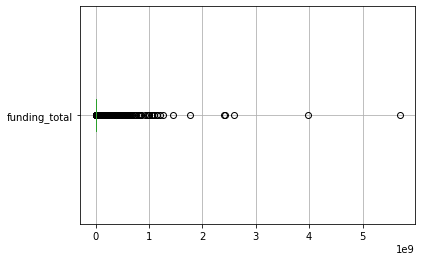

In [35]:
# Построим диаграмму 'ящик с усами'
boxplot = df.boxplot(column='funding_total',
                     vert=False,
                     figsize=(6, 4))
plt.show()

Графически довольно трудно оценить типичное значение из-за большого размаха данных и так как данные содержат много выбросов.<br>
Это было бы возможно скорее всего, если перевести данные, например к логарифмическому виду. Если это будет необходимо, могу попробовать сделать. <br>

In [36]:
# Вычислим IQR
Q1 = 0
Q3 =  5650650
IQR = Q3 - Q1
up_bound = Q3 + 1.5*IQR
low_bound = Q1 - 1.5*IQR
print(up_bound)

14126625.0


Вывод из анализа статистических данных:
- Нормальный диапазон данных: 0 - 5 650 650 (от 0% до 75%)
- Типичное значение: 600 000 (оцениваем по медиане, так как большое количество выбросов)
- Выбросы начинаются от 14 126 625

<div class="alert alert-block alert-success">
<h2> Комментарий ревьюера v. 3 ✔️</h2>
    
Отлично, выбросы проанализированы и можно сделать вывод, что в данных есть выбросы, поэтому для оценки типичного значения подходит медиана, а не среднее.
</div>


### 3.3. Куплены забесплатно?

- Исследуйте компании, которые были проданы за ноль или за один доллар, и при этом известно, что у них был ненулевой общий объём финансирования.

- Рассчитайте аналитически верхнюю и нижнюю границу выбросов для столбца `funding_total` и укажите, каким процентилям границы соответствуют.

In [37]:
# Объединим таблицы 
df_merged = df_acquisition.merge(df, left_on = 'acquired_company_id', right_on = 'company_id_companies', how = 'left')
# Выделим таблицу, согласно условию
df_merged_filt = df_merged[((df_merged['price_amount'] == 1) | (df_merged['price_amount'] == 0)) & (df_merged['funding_total'] > 0)]
df_merged_filt

,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at,company_id_companies,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones
7,14,318,314,cash,0,2006-10-01,314.0,Reddit,web,acquired,2005-01-01,NaT,reddit.com,reddit,USA,0.0,1.0,100000.0,3.0
49,65,146,698,cash,0,2007-08-01,698.0,Maya's Mom,web,acquired,NaT,NaT,mayasmom.com,NaN,USA,0.0,1.0,1000000.0,2.0
51,67,156,718,cash,0,2007-08-01,718.0,Glimpse,ecommerce,acquired,NaT,NaT,glimpse.com,NaN,USA,0.0,1.0,4000000.0,0.0
65,87,1035,175,cash,0,2007-10-01,175.0,Newsvine,web,acquired,2005-03-31,NaT,newsvine.com,NaN,USA,0.0,1.0,1250000.0,0.0
85,115,396,1582,cash,0,2007-12-01,1582.0,BeliefNet,web,acquired,2008-01-01,NaT,beliefnet.com,eliefnet,USA,0.0,1.0,7000000.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9363,10481,29,165128,NaN,0,2013-12-06,165128.0,EvntLive,music,acquired,NaT,NaT,evntliveinc.com,EVNTLIVE,USA,0.0,1.0,2300000.0,2.0
9382,10500,42365,79582,NaN,0,2013-12-10,79582.0,lucierna,software,acquired,2009-05-22,NaT,lucierna.com,lucierna_inc,ESP,0.0,1.0,2106600.0,0.0
9385,10503,1434,60436,NaN,0,2013-12-10,60436.0,Cloudmeter,enterprise,acquired,2007-04-01,NaT,cloudmeter.com,cloudmeter,USA,0.0,1.0,5000000.0,2.0
9388,10507,29,169154,NaN,0,2013-12-09,169154.0,Quik.io,software,acquired,2011-02-03,NaT,quik.io,quik_io,USA,0.0,2.0,1280000.0,2.0


In [38]:
# Рассчитаем верхнюю и нижнюю границу с помощью IQR
# Вычислим квартили Q1 и Q3
Q1 = df_merged_filt['funding_total'].quantile(0.25)
Q3 = df_merged_filt['funding_total'].quantile(0.75)
# Вычислим IQR
IQR = Q3 - Q1
up_bound = Q3 + 1.5*IQR
low_bound = Q1 - 1.5*IQR
print(f"Нижняя граница выбросов: {low_bound:,.0f}")
print(f"Верхняя граница выбросов: {up_bound:,.0f}")

Нижняя граница выбросов: -18,250,000
Верхняя граница выбросов: 35,750,000


Тут я затупила как определить процентиль, которым соответсвуют полученные значения. Гугление мне подсказало, что есть функция percentileofscore в библотеки scipy. Решила сделать через нее. Но если подскажите как это можно было сделать иначе, буду благодарна 
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html

<div class="alert alert-block alert-success">
<h2> Комментарий ревьюера v. 3 ✔️</h2>
    
Функция percentileofscore из библотеки scipy это подходящий вариант. Но если есть ограничение на установленные библиотеки, то можно написать собственную функцию используя функции из модуля statistics (не требует дополнительной установки).
    
Помимо этого, можно воспользоваться фунциями из pandas:
    
```
data = pd.Series([1, 2, 3, 4, 5, 6])
score = 3

percentile = data.rank(pct=True).loc[data == score].values[0] * 100
``` 
</div>

In [39]:
!pip install scipy
from scipy.stats import percentileofscore

In [40]:
# С помощью функции percentileofscore вычислим каким перцентилям соответствуют рассчитанные значения
low_per = percentileofscore(df_merged_filt['funding_total'], low_bound, kind='rank')
up_per = percentileofscore(df_merged_filt['funding_total'], up_bound, kind='rank')

print(f"Нижняя граница выбросов ({low_bound:,.2f}) соответствует приблизительно {low_per:.2f}-му процентилю")
print(f"Верхняя граница выбросов ({up_bound:,.2f}) соответствует приблизительно {up_per:.2f}-му процентилю")

Нижняя граница выбросов (-18,250,000.00) соответствует приблизительно 0.00-му процентилю
Верхняя граница выбросов (35,750,000.00) соответствует приблизительно 90.91-му процентилю


<div class="alert alert-block alert-success">
<h2> Комментарий ревьюера v. 3 ✔️</h2>
    
Отлично, выбросы проанализированы и границы определены. Метод IQR подходит для вычисления границ выбросов, но есть и другие методы например, z-score (https://www.geeksforgeeks.org/z-score-in-statistics/).
</div>


### 3.4. Цены стартапов по категориям

Категории стартапов с типично высокими ценами покупки стартапов и значительным разбросом цен могут быть привлекательными для крупных инвесторов, которые готовы к высоким рискам ради потенциально больших доходов. Среди категорий стартапов выделите категории стартапов, характеризующиеся:

- типично высокими ценами;
- и наибольшим разбросом цен за стартап.

Объясните, почему решили составить топ именно из такого числа категорий и почему рассчитывали именно так.

In [41]:
pd.set_option('display.float_format', '{:,.2f}'.format)

In [42]:
# Сгрупируем данные по 'category_code' и найдем 'mean', 'std', 'count'
df_group_category = df_merged.groupby('category_code')['price_amount'].agg(['median', 'std', 'count']).reset_index()
df_group_category 

,category_code,median,std,count
0,advertising,0,"279,922,643.51",314
1,analytics,0,"52,671,642.49",40
2,automotive,43000000,"2,297,757,559.01",5
3,biotech,13200000,"1,540,373,521.41",454
4,cleantech,0,"552,287,325.04",116
5,consulting,0,"505,481,358.76",135
6,design,0,0.00,4
7,ecommerce,0,"151,236,352.36",275
8,education,0,"125,364,201.89",33
9,enterprise,0,"128,088,235,060.17",412


In [43]:
top_price = df_group_category[['category_code', 'median']].sort_values(ascending = False, by = 'median').head(5)
top_std = df_group_category[['category_code', 'std']].sort_values(ascending = False, by = 'std').head(5)

print("Категории с высокой средней ценой (ТОП-5):")
display(top_price)

print("\nКатегории с высоким разбросом цен (ТОП-5):")
display(top_std)

Категории с высокой средней ценой (ТОП-5):


,category_code,median
23,nanotech,584000000
18,manufacturing,72000000
30,real_estate,50000000
2,automotive,43000000
3,biotech,13200000



Категории с высоким разбросом цен (ТОП-5):


,category_code,std
9,enterprise,"128,088,235,060.17"
29,public_relations,"4,059,244,205.05"
30,real_estate,"2,505,122,913.06"
2,automotive,"2,297,757,559.01"
3,biotech,"1,540,373,521.41"


- Было выбрано топ-5 категорий, так как данное количество является оптимальным, медиана показывет в каких категориях самая высокая цена на стартапы, а стандартное отклонение показывает разброс цен.
- К топ-5 категориям с высокой средней ценой относятся категории: nanotech, manufacturing, real_estate, automotive, biotech
- К топ-5 категориям с высоким разбросом цен относятся: enterprice, public_relations, real_estate, automotive, biotech
- Категории, которые относятся к обоим топам: real_estate, automotive, biotech

<div class="alert alert-block alert-success">
<h2> Комментарий ревьюера v. 3 ✔️</h2>
    
Можно еще отметить, что высокий разброс цен может говорить о том, что инвестировать в данную категорию стартапов рисковано, но с другой стороны в случае успешного выбора есть возможность получить более высокий доход чем в случае инвестирования в менее рискованную категорию стартапов.
</div>


### 3.5. Сколько раундов продержится стартап перед покупкой

- Необходимо проанализировать столбец `funding_rounds`. Исследуйте значения столбца. Заказчика интересует типичное значение количества раундов для каждого возможного статуса стартапа.
- Постройте график, который отображает, сколько в среднем раундов финансирования проходило для стартапов из каждой группы. Сделайте выводы.

In [44]:
df['funding_rounds'].describe()

count   40,747.00
mean         1.29
std          1.26
min          0.00
25%          1.00
50%          1.00
75%          2.00
max         15.00
Name: funding_rounds, dtype: float64

In [45]:
df_group_status = df.groupby('status')['funding_rounds'].mean().reset_index().sort_values(ascending = False, by = 'funding_rounds')

In [46]:
df_group_status

,status,funding_rounds
2,ipo,1.93
3,operating,1.52
1,closed,1.38
0,acquired,0.52


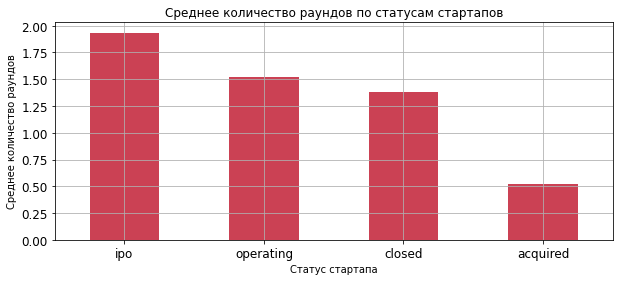

In [47]:
df_group_status.plot(kind = 'bar', x='status', y='funding_rounds', legend=False,
                                          figsize = (10, 4), 
                                          title = 'Среднее количество раундов по статусам стартапов',
                                          xlabel = 'Статус стартапа',
                                          ylabel = 'Среднее количество раундов', 
                                          rot = 0, 
                                          color = '#cb4154',
                                          grid = True,
                                          fontsize = 12)
plt.show()

- IPO-компании проходят больше всего раундов (1.93), а приобретенные — меньше всех (0.52).
- В связи с этим, можно предположить, что успешные стартапы проходят больше раундов перед выходом на IPO, а приобретенные компании продаются на ранних стадиях.

<div class="alert alert-block alert-success">
<h2> Комментарий ревьюера v. 3 ✔️</h2>
    
До стадии IPO доходят только самые успешные стартапы и соответственно число раундов финансирования, как правило, больше чем у остальных стадий развития стартапов.
</div>


## Шаг 4. Итоговый вывод и рекомендации

<b> Основные выводы: </b>
1) Анализ раундов финансирования
 - Максимальные размеры средств в одном раунде наблюдались в 2005 году.
 - В 2013 году наблюдается рост числа раундов и размеров финансирования, что указывает на больший интерес инвесторов.
2) Информация о сотрудниках
- В крупных компаниях, как правило, более полная информация об образовании сотрудников. Это может быть связано с более строгими требованиями к образованию сотрудников или же в силу лучшей организации сбора и хранения персональных данных о сотрудниках.
3) Объединение данных
- Анализ показал, что столбец network_username не подходит для объединения данных.
4) Анализ выбросов
- Были выявлены выбросы в размерах общего финансирования, для которых использовались перцентильные значения, так как из-за большого количества выбросов метод IQR раюотает некорректно.
- Типичные суммы финансирования варьируются от 0 до 5,6 миллионов.
5) Цены стартапов по категориям:
- Самыми привлекательными для инвесторов являются стартапы с высокими ценами и значительным разбросом цен: biotech, automotive и real_estate.
6) Количество раундов для разных статусов стартапов:
- Стартапы, прошедшие IPO, в среднем проходят больше раундов (1.93), в отличие от приобретенных стартапов (0.52).

<b> Рекомендации: </b>
Инвесторы должны обратить внимание на стартапы с несколькими раундами финансирования и подготовкой к IPO, так как они могут иметь больше шансов на успешное развитие.

<div class="alert alert-block alert-success">
<h2> Комментарий ревьюера v. 3 ✔️</h2>
    
Молодец, что подробно описала основные результаты проекта и сформулировала отдельно рекомендации по инвестированию в стартапы. 
    
Как правило, заказчика в первую очередь по итогам проекта интересуют рекомендации по улучшению эффективности финансирования стартапов.
</div>